<center> <strong> GA Genetic Algorithm for MLP Mutliple Layer Perceptron

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch
from torch import nn
from torch.utils.data import DataLoader

from sklearn.preprocessing import StandardScaler


### MLP Architecture

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_1='/content/drive/MyDrive/Dataset_DL/Dataset/DataSetTrussStructure.xlsx'
path_2='/content/drive/MyDrive/Dataset_DL/Dataset/DataSetTrussStructureContraintes.xlsx'
path_3="/content/drive/MyDrive/Dataset_DL/Dataset/DataSetTrussStructureAplatit.xlsx"
path_4="/content/drive/MyDrive/Dataset_DL/Dataset/DataSetTrussStructureDeplacements.xlsx"

In [4]:
df1 = pd.read_excel(path_1)
df2 = pd.read_excel(path_2)
df3 = pd.read_excel(path_3)
df4 = pd.read_excel(path_4)

In [5]:
# Merge the datasets based on the common column 'N° image'
merged_df12 = pd.merge(df1, df2, on='N° image', how='inner')
merged_df34 = pd.merge(df3, df4, on='N° image', how='inner')
merged_df = pd.merge(merged_df12, merged_df34, on='N° image', how='inner')

In [6]:
data=merged_df.drop('N° image',axis=1)
X_W = data[['CS1'	,'C1'	,'C2','C4','C5'	,'C6','CX2','CX3','CY3','DX2','DY2','DX3','DY3','Energie']]
X = data[['CS1'	,'C1'	,'C2','C4','C5'	,'C6','CX2','CX3','CY3','DX2','DY2','DX3','DY3']]
y_energy = data['Energie']
y_weight = data['Poids']


In [7]:
X_W

,CS1,C1,C2,C4,C5,C6,CX2,CX3,CY3,DX2,DY2,DX3,DY3,Energie
0,0.022575,-49413.749818,-55408.642923,39179.827147,69881.595161,39179.827147,9.144,9.144000,9.144000,-0.000007,-0.000025,5.195944e-06,-1.989229e-05,0.025088
1,0.022575,-64454.631262,-24232.793281,-27591.883860,129900.164436,-6299.320851,9.144,5.249471,0.463345,-0.000009,-0.000043,-1.855864e-06,-3.920309e-08,0.043002
2,0.022575,-46291.240662,-53793.898904,48328.429233,57418.869607,50211.144062,9.144,8.364926,6.571136,-0.000006,-0.000021,1.822227e-06,-1.575411e-05,0.021369
3,0.022575,-88722.556188,14463.601816,1388.186340,123996.252997,15405.208939,9.144,0.070916,7.952127,-0.000012,-0.000045,2.828932e-05,1.415966e-06,0.044654
4,0.022575,-104616.669276,16680.435366,51565.843192,86314.545613,42381.216503,9.144,6.273326,1.815285,-0.000014,-0.000037,3.128445e-06,-5.127493e-06,0.036768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0.022575,-62434.746214,-39667.408447,60837.381755,48835.884406,59247.701920,9.144,5.756883,6.562562,-0.000008,-0.000021,2.114104e-06,-8.535411e-06,0.021233
1997,0.022575,-71604.305993,-37365.025875,62018.216115,52433.427410,54650.636696,9.144,3.953545,7.744363,-0.000009,-0.000023,1.400329e-06,-6.005413e-06,0.023403
1998,0.022575,-49112.805725,-49162.747232,53117.064374,52183.993556,56337.704360,9.144,7.780071,5.773025,-0.000007,-0.000020,1.595819e-06,-1.374284e-05,0.020354
1999,0.022575,-93123.757792,4571.469736,6685.493753,122625.463078,3128.424155,9.144,6.260205,0.847129,-0.000012,-0.000045,4.560391e-07,-2.466710e-07,0.044875


In [8]:
data=merged_df.drop('N° image',axis=1)

In [9]:
# Split the dataset into training and testing sets
X_train_E, X_test_E, y_energy_train, y_energy_test = train_test_split(X, y_energy, test_size=0.2, random_state=42)
X_train_W, X_test_W, y_weight_train, y_weight_test = train_test_split(X, y_weight, test_size=0.2, random_state=42)

In [10]:
X_train_E.reset_index(drop=True, inplace=True)
X_test_E.reset_index(drop=True, inplace=True)
y_energy_train.reset_index(drop=True, inplace=True)
y_energy_test.reset_index(drop=True, inplace=True)

X_train_W.reset_index(drop=True, inplace=True)
X_test_W.reset_index(drop=True, inplace=True)
y_weight_train.reset_index(drop=True, inplace=True)
y_weight_test.reset_index(drop=True, inplace=True)

In [11]:
y_weight_train.shape

(1600,)

In [12]:
# Initialize the scalers for X and y
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [13]:
# Fit the scaler on the training data and transform both the training and testing data for X
X_train_W = scaler_X.fit_transform(X_train_W)
X_test_W = scaler_X.transform(X_test_W)

# Convert y_weight_train and y_weight_test to NumPy arrays and reshape them
y_weight_train_array = y_weight_train.to_numpy().reshape(-1, 1)
y_weight_test_array = y_weight_test.to_numpy().reshape(-1, 1)

# Fit the scaler on the training data and transform both the training and testing data for y
y_weight_train= scaler_y.fit_transform(y_weight_train_array).ravel()
y_weight_test = scaler_y.transform(y_weight_test_array).ravel()

In [14]:
len(y_weight_train)

1600

In [15]:
# Fit the scaler on the training data and transform both the training and testing data for X
X_train_E= scaler_X.fit_transform(X_train_E)
X_test_E= scaler_X.transform(X_test_E)


In [16]:
class Dataset(torch.utils.data.Dataset):
    '''
    Prepare the Boston dataset for regression
    '''

    def __init__(self, X, y, scale_data=True,energy=False):
        if not torch.is_tensor(X) and not torch.is_tensor(y):
            # Reshape y into a 2D array with a single column
            y = y.reshape(-1, 1)

            # Apply scµaling if necessary
            if scale_data:
                X = StandardScaler().fit_transform(X)
                if not energy:
                  y_scaler = StandardScaler()
                  y = y_scaler.fit_transform(y)
                else:
                  y_scaler = None

            self.X = torch.from_numpy(X)
            self.y = torch.from_numpy(y)
            self.y_scaler = y_scaler

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]


In [17]:

dataset =Dataset(X_train_W, y_weight_train)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)

In [18]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch
import random
import torch.nn as nn
import numpy as np
from scipy.special import expit



In [19]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        '''
        Forward pass
        '''
        return self.layers(x)




In [20]:
def encode_chromosome(m_range):
    return np.random.choice(m_range)

def decode_chromosome(chromosome):
    return chromosome



In [21]:
def create_population(population_size, input_size, output_size, hidden_layer_range):
    population = []
    for _ in range(population_size):
        hidden_size = np.random.choice(hidden_layer_range)
        neural_network = MLP(input_size, hidden_size, output_size)
        population.append((hidden_size, neural_network))
    return population



In [23]:
def fitness(network, X_train, y_train):
    network.eval()
    criterion = nn.MSELoss()
    with torch.no_grad():
        inputs = torch.tensor(X_train, dtype=torch.float32)
        targets = torch.tensor(y_train, dtype=torch.float32)
        outputs = network(inputs)
        loss = criterion(outputs, targets)
    return -loss.item()  # Negative MSE as we want to maximize fitness




In [24]:
def selection(population, X_train, y_train, elite_percentage=0.6):
    fitness_scores = [(individual, fitness(individual[1], X_train, y_train)) for individual in population]
    sorted_population = sorted(fitness_scores, key=lambda x: x[1], reverse=True)
    elite_size = int(elite_percentage * len(population))
    selected = [individual for individual, _ in sorted_population[:elite_size]]
    return selected



In [25]:
def crossover(parent1, parent2, input_size, output_size):
    hidden_size1 = parent1[0]
    hidden_size2 = parent2[0]
    crossover_point = random.randint(1, min(len(bin(hidden_size1)), len(bin(hidden_size2)))-1)
    child1_hidden_size = int(bin(hidden_size1)[:crossover_point] + bin(hidden_size2)[crossover_point:], 2)
    child2_hidden_size = int(bin(hidden_size2)[:crossover_point] + bin(hidden_size1)[crossover_point:], 2)
    return (child1_hidden_size, MLP(input_size, child1_hidden_size, output_size)), \
           (child2_hidden_size, MLP(input_size, child2_hidden_size, output_size))




In [26]:
def mutate(individual, mutation_rate):
    if random.random() < mutation_rate:
        mutated_hidden_size = encode_chromosome(hidden_layer_range)
        individual = (mutated_hidden_size, MLP(input_size, mutated_hidden_size, output_size))
    return individual



In [27]:
population_size = 5
generations = 10
hidden_layer_range = [32, 64, 128, 256]
input_size = X_train_W.shape[1]
output_size = 1



In [28]:
torch.empty((1,13), dtype=None, device=None, requires_grad=False)


tensor([[ 6.7357e+22,  6.6718e-10,  2.1707e-18,  7.1450e+31,  6.1970e-04,
          1.0382e+21,  7.2148e+22,  1.1492e-38,  3.8280e+23,  4.4030e-41,
          1.5835e-43,  0.0000e+00, -5.4665e-06]])

In [29]:
population = create_population(population_size, input_size, output_size, hidden_layer_range)


### For Energy

In [30]:

for generation in range(generations):
    selected = selection(population, X_train_E, y_energy_train.values)
    new_population = []
    while len(new_population) < population_size:
        parent1, parent2 = random.sample(selected, 2)
        offspring1, offspring2 = crossover(parent1, parent2, input_size, output_size)
        offspring1 = mutate(offspring1,0.6)
        offspring2 = mutate(offspring2,0.6)
        new_population.extend([offspring1, offspring2])
    population = new_population[:population_size]

best_network = max(population, key=lambda individual: fitness(individual[1],X_train_E, y_energy_train.values))[1]




/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1600])) that is different to the input size (torch.Size([1600, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [31]:
def train_network(network, X_train, y_train, epochs=100, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(network.parameters(), lr=learning_rate)
    network.train()
    for epoch in range(epochs):
        inputs = torch.tensor(X_train, dtype=torch.float32)
        targets = torch.tensor(y_train, dtype=torch.float32)
        optimizer.zero_grad()
        outputs = network(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()



In [32]:

train_network(best_network,X_train_E, y_energy_train.values, epochs=100, learning_rate=0.001)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1600])) that is different to the input size (torch.Size([1600, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [33]:
def predict(network, X_test):
    network.eval()
    with torch.no_grad():
        inputs = torch.tensor(X_test, dtype=torch.float32)
        outputs = network(inputs)
    return outputs.numpy()

test_predictions = predict(best_network,X_test_E)
test_mse = np.mean((y_energy_test.values - test_predictions) ** 2)
print(f"Test MSE: {test_mse}")

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test data using the best network
best_network.eval()
with torch.no_grad():
    test_inputs = torch.tensor(X_test_E, dtype=torch.float32)
    test_outputs = best_network(test_inputs)
test_predictions = test_outputs.numpy().flatten()

# Calculate regression metrics
mse = mean_squared_error(y_energy_test.values, test_predictions)
mae = mean_absolute_error(y_energy_test.values, test_predictions)
r2 = r2_score(y_energy_test.values, test_predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2:.2f}")

# Calculate accuracy based on error threshold
error_threshold = 0.1  # Define your own threshold
accuracy = np.mean(np.abs(y_energy_test.values - test_predictions) < error_threshold)
print(f"Accuracy (Error Threshold {error_threshold}): {accuracy * 100:.2f}%")



In [34]:
test_predictions = predict(best_network,X_test_E)
test_mse = np.mean((y_energy_test.values - test_predictions) ** 2)
print(f"Test MSE: {test_mse}")

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test data using the best network
best_network.eval()
with torch.no_grad():
    test_inputs = torch.tensor(X_test_E, dtype=torch.float32)
    test_outputs = best_network(test_inputs)
test_predictions = test_outputs.numpy().flatten()

# Calculate regression metrics
mse = mean_squared_error(y_energy_test.values, test_predictions)
mae = mean_absolute_error(y_energy_test.values, test_predictions)
r2 = r2_score(y_energy_test.values, test_predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2:.2f}")

# Calculate accuracy based on error threshold
error_threshold = 0.1  # Define your own threshold
accuracy = np.mean(np.abs(y_energy_test.values - test_predictions) < error_threshold)
print(f"Accuracy (Error Threshold {error_threshold}): {accuracy * 100:.2f}%")



Test MSE: 0.00014383670814353903


In [35]:
!pip install torchviz


  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test data using the best network
best_network.eval()
with torch.no_grad():
    test_inputs = torch.tensor(X_test_E, dtype=torch.float32)
    test_outputs = best_network(test_inputs)
test_predictions = test_outputs.numpy().flatten()

# Calculate regression metrics
mse = mean_squared_error(y_energy_test.values, test_predictions)
mae = mean_absolute_error(y_energy_test.values, test_predictions)
r2 = r2_score(y_energy_test.values, test_predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2:.2f}")

# Calculate accuracy based on error threshold
error_threshold = 0.1  # Define your own threshold
accuracy = np.mean(np.abs(y_energy_test.values - test_predictions) < error_threshold)
print(f"Accuracy (Error Threshold {error_threshold}): {accuracy * 100:.2f}%")



### For Weight

In [ ]:
for generation in range(generations):
    selected = selection(population, X_train_W, y_weight_train)
    new_population = []
    while len(new_population) < population_size:
        parent1, parent2 = random.sample(selected, 2)
        offspring1, offspring2 = crossover(parent1, parent2, input_size, output_size)
        offspring1 = mutate(offspring1,0.6)
        offspring2 = mutate(offspring2,0.6)
        new_population.extend([offspring1, offspring2])
    population = new_population[:population_size]

best_network = max(population, key=lambda individual: fitness(individual[1],X_train_W, y_weight_train))[1]


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1600])) that is different to the input size (torch.Size([1600, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
train_network(best_network,X_train_W, y_weight_train, epochs=100, learning_rate=0.001)


In [ ]:
test_predictions = predict(best_network,X_test_W)
test_mse = np.mean((y_weight_test- test_predictions) ** 2)
print(f"Test MSE: {test_mse}")

Test MSE: 0.9294627029790207


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1600])) that is different to the input size (torch.Size([1600, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


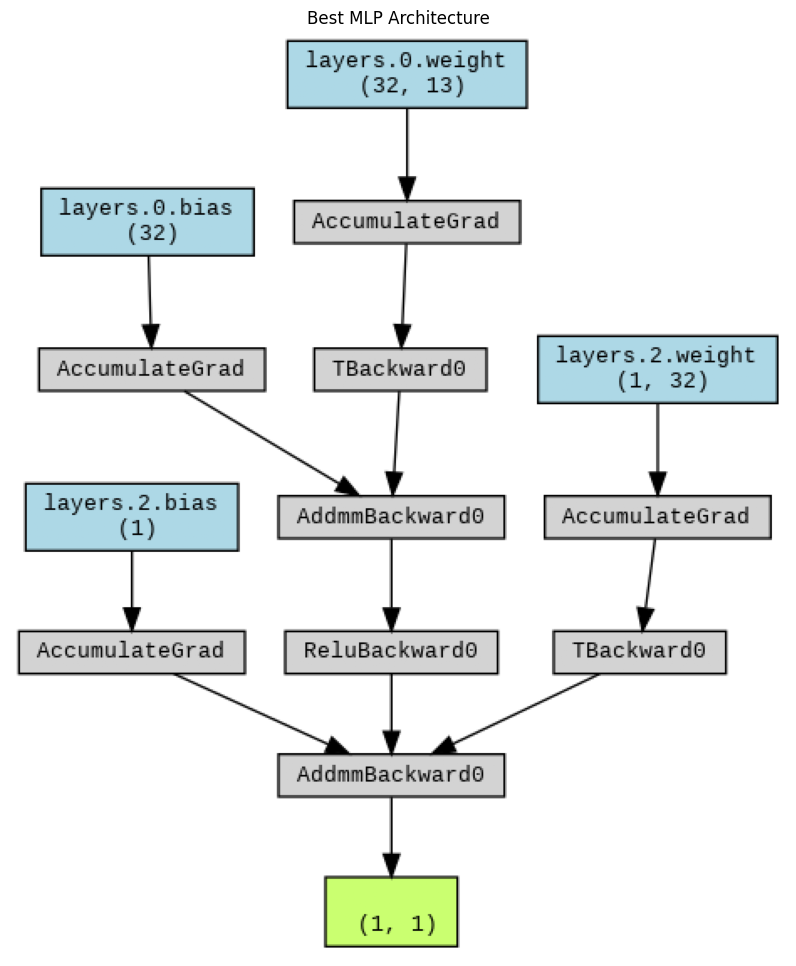

Mean Squared Error (MSE): 0.022652433833788288
Mean Absolute Error (MAE): 0.11749463198429745
R-squared: -262.14
Accuracy (Error Threshold 0.1): 53.37%


In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from torchviz import make_dot
import matplotlib.pyplot as plt

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.layers(x)

# Function to calculate fitness (negative MSE)
def fitness(network, X_train, y_train):
    network.eval()
    criterion = nn.MSELoss()
    with torch.no_grad():
        inputs = torch.tensor(X_train, dtype=torch.float32)
        targets = torch.tensor(y_train, dtype=torch.float32)
        outputs = network(inputs)
        loss = criterion(outputs, targets)
    return -loss.item()

# Genetic Algorithm functions
def create_population(population_size, input_size, output_size, hidden_layer_range):
    population = []
    for _ in range(population_size):
        hidden_size = np.random.choice(hidden_layer_range)
        neural_network = MLP(input_size, hidden_size, output_size)
        population.append((hidden_size, neural_network))
    return population

def selection(population, X_train, y_train, elite_percentage=0.6):
    fitness_scores = [(individual, fitness(individual[1], X_train, y_train)) for individual in population]
    sorted_population = sorted(fitness_scores, key=lambda x: x[1], reverse=True)
    elite_size = int(elite_percentage * len(population))
    selected = [individual for individual, _ in sorted_population[:elite_size]]
    return selected

def crossover(parent1, parent2, input_size, output_size):
    hidden_size1 = parent1[0]
    hidden_size2 = parent2[0]
    crossover_point = random.randint(1, min(len(bin(hidden_size1)), len(bin(hidden_size2)))-1)
    child1_hidden_size = int(bin(hidden_size1)[:crossover_point] + bin(hidden_size2)[crossover_point:], 2)
    child2_hidden_size = int(bin(hidden_size2)[:crossover_point] + bin(hidden_size1)[crossover_point:], 2)
    return (child1_hidden_size, MLP(input_size, child1_hidden_size, output_size)), \
           (child2_hidden_size, MLP(input_size, child2_hidden_size, output_size))

def mutate(individual, mutation_rate, hidden_layer_range):
    if random.random() < mutation_rate:
        mutated_hidden_size = np.random.choice(hidden_layer_range)
        individual = (mutated_hidden_size, MLP(input_size, mutated_hidden_size, output_size))
    return individual

# Parameters
population_size = 5
generations = 10
hidden_layer_range = [32, 64, 128, 256]
input_size = X_train_W.shape[1]
output_size = 1
mutation_rate = 0.6

# Create initial population
population = create_population(population_size, input_size, output_size, hidden_layer_range)

# Genetic Algorithm loop
for generation in range(generations):
    selected = selection(population, X_train_E, y_energy_train.values)
    new_population = []
    while len(new_population) < population_size:
        parent1, parent2 = random.sample(selected, 2)
        offspring1, offspring2 = crossover(parent1, parent2, input_size, output_size)
        offspring1 = mutate(offspring1, mutation_rate, hidden_layer_range)
        offspring2 = mutate(offspring2, mutation_rate, hidden_layer_range)
        new_population.extend([offspring1, offspring2])
    population = new_population[:population_size]

# Get the best network from the population
best_network = max(population, key=lambda individual: fitness(individual[1], X_train_E, y_energy_train.values))[1]

# Plot the best network's architecture
sample_input = torch.randn(1, input_size)  # Sample input to infer architecture
model_graph = make_dot(best_network(sample_input), params=dict(best_network.named_parameters()))
model_graph.render("best_network_architecture", format="png")

# Display the graph
img = plt.imread("best_network_architecture.png")
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis('off')
plt.title('Best MLP Architecture')
plt.show()

# Evaluate the best network on test set
best_network.eval()
with torch.no_grad():
    test_inputs = torch.tensor(X_test_E, dtype=torch.float32)
    test_outputs = best_network(test_inputs)
test_predictions = test_outputs.numpy().flatten()

# Calculate regression metrics
mse = mean_squared_error(y_energy_test.values, test_predictions)
mae = mean_absolute_error(y_energy_test.values, test_predictions)
r2 = r2_score(y_energy_test.values, test_predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2:.2f}")

# Calculate accuracy based on error threshold
error_threshold = 0.1  # Define your own threshold
accuracy = np.mean(np.abs(y_energy_test.values - test_predictions) < error_threshold)
print(f"Accuracy (Error Threshold {error_threshold}): {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found i

Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


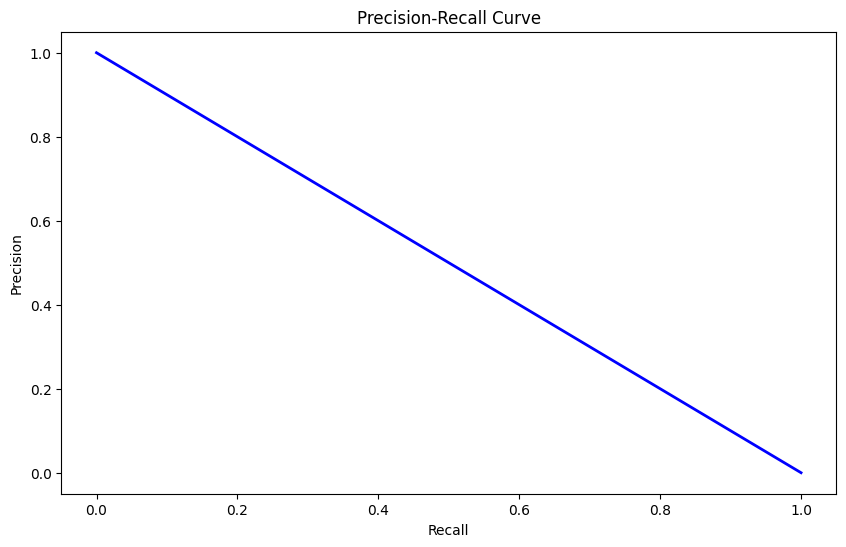

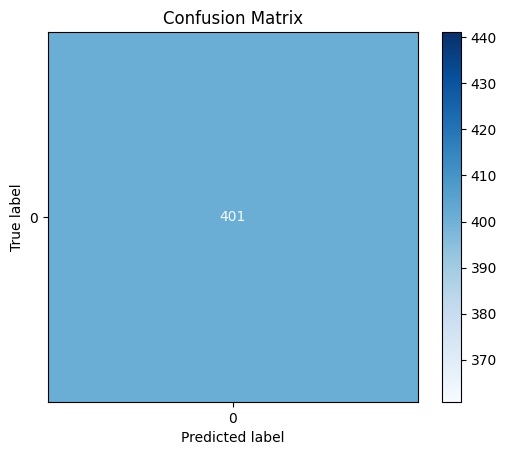

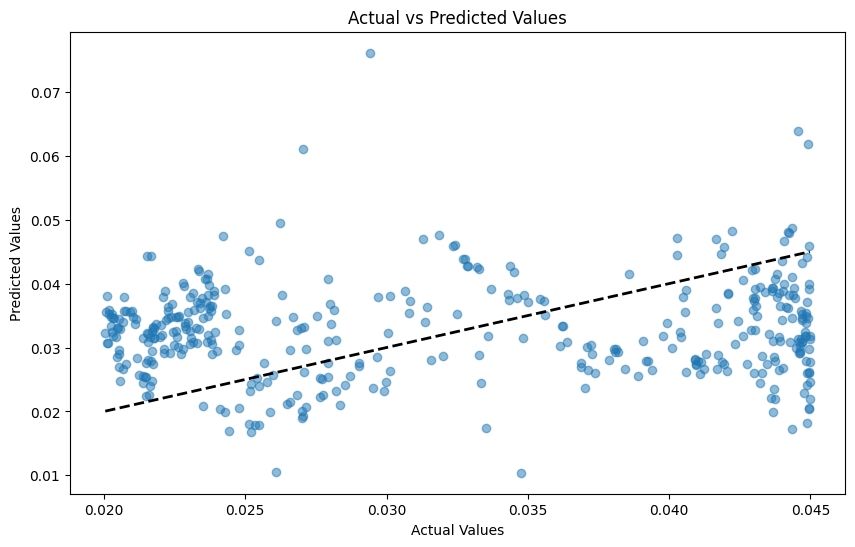

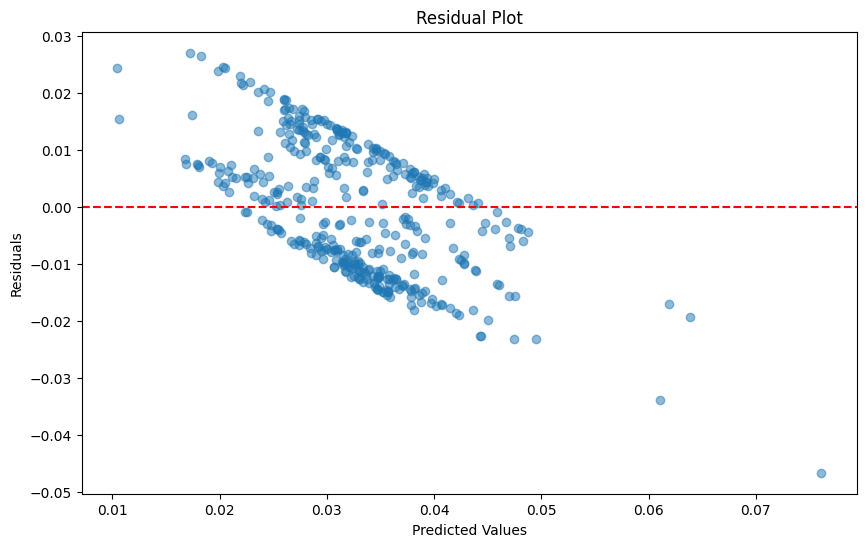

In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import torch

# Make predictions on the test data using the best network
best_network.eval()
with torch.no_grad():
    test_inputs = torch.tensor(X_test_E, dtype=torch.float32).to(device)
    test_outputs = best_network(test_inputs).cpu()
test_predictions = test_outputs.numpy().flatten()

# Assuming we have a classification task, transform predictions and calculate additional metrics
threshold = 0.5  # Define your classification threshold if needed
binary_predictions = (test_predictions > threshold).astype(int)
binary_labels = (y_energy_test.values > threshold).astype(int)

# Calculate classification metrics
precision = precision_score(binary_labels, binary_predictions)
recall = recall_score(binary_labels, binary_predictions)
f1 = f1_score(binary_labels, binary_predictions)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plotting Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(binary_labels, test_predictions)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(binary_labels, binary_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plotting Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_energy_test.values, test_predictions, alpha=0.5)
plt.plot([y_energy_test.values.min(), y_energy_test.values.max()],
         [y_energy_test.values.min(), y_energy_test.values.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Plotting Residuals
residuals = y_energy_test.values - test_predictions
plt.figure(figsize=(10, 6))
plt.scatter(test_predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
